# **3 - Hopfield Network**

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

### 0,1 Pattern

In [ ]:
numbers = {}
numbers[0] = [[1 for i in range(8)] for j in range(8)]
numbers[1] = [[-1 for i in range(8)] for j in range(8)]

patterns = {}
patterns[0] = [(i, j) for i in range(2, 6) for j in range(2, 6)]
patterns[1] = [(0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), 
              (2, 4), (3, 3), (3, 4), (4, 3), (4, 4), (5, 3), (5, 4), 
              (6, 3), (6, 4), (7, 3), (7, 4)]

for pattern in patterns[0]:
  numbers[0][pattern[0]][pattern[1]] = -1

for pattern in patterns[1]:
  numbers[1][pattern[0]][pattern[1]] = 1

In [ ]:
def do_hebbian_rule(s, t):
  w = np.dot(s.T, t)
  return w - np.identity(len(s.T))

In [ ]:
def add_noise(noise_rate, inputs, alternative):
  noisy_inputs = inputs.copy()
  for input in noisy_inputs:
    noise_count = int(noise_rate * len(input))
    noises_index = random.sample(range(len(input)), noise_count)
    for noise_index in noises_index:
      input[noise_index] = alternative * input[noise_index]
  return noisy_inputs

In [ ]:
S =  np.array(list(numbers.values())).reshape(2, 64)
W = do_hebbian_rule(S, S)

In [ ]:
def run_model(S, W, iterate_num=30):
  correct_count = {0:[], 1:[]}
  noise_rates = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6 , 0.7, 0.8, 0.9, 1]
  for noise_rate in noise_rates:
    noisy_S = add_noise(noise_rate, S, -1)
    zero_prediction =  hopfield(np.array([noisy_S[0]]), W, iterate_num)
    one_predicttion = hopfield(np.array([noisy_S[1]]), W, iterate_num)
    correct_count[0].append((zero_prediction == S[0]).sum())
    correct_count[1].append((one_predicttion == S[1]).sum())

  return correct_count, noise_rates

In [ ]:
def plot_result(correct_counts, noises):
  plt.figure(figsize=(12,10))
  plt.xlabel('Noise Percentage')
  plt.ylabel('Hamming Distance')
  # plt.title('Auto-assosiative Network Accuracy with Random Vectors')
  for number, count in correct_counts.items():
      plt.plot(np.array(noises)*100, 64 - np.array(count), label = 'Result for {} Number'.format(number))
  plt.legend()
  plt.show()

In [ ]:
def hopfield(s,  W, iterate_num=30):
  converged = False
  previous_y = []
  for run in range(iterate_num):
    if converged: break
    # Step 1
    for x in s:
      # Step 2
      y = x.copy()
      # Step 3
      random_order = random.sample(range(len(y)), len(y))
      for i in random_order:
        # Step 4
        y_in = y[i] + np.dot(y, W.T[i])
        # Step 5, 6
        if y_in > 0: y[i] = 1
        else: y[i] = -1
      # Step 7
      exist_loop = False
      for previous in previous_y:
        if np.array_equal(y, previous):
          exist_loop = True
          break
      if exist_loop or np.array_equal(y, x):
        converged = True
      previous_y.append(y.copy())
  return previous_y[-1]

### Test with 30% Mistake

In [ ]:
noisy_S = add_noise(0.3, S, -1)
zero_prediction =  hopfield(np.array([noisy_S[0]]), W, 30)
one_predicttion = hopfield(np.array([noisy_S[1]]), W, 30)

print('Zero:')
print(np.where(zero_prediction.reshape(8, 8) == 1, '#', '.'))
print('One:')
print(np.where(one_predicttion.reshape(8, 8) == 1, '#', '.'))

Zero:
[['#' '#' '#' '#' '#' '#' '#' '#']
 ['#' '#' '#' '#' '#' '#' '#' '#']
 ['#' '#' '.' '.' '.' '.' '#' '#']
 ['#' '#' '.' '.' '.' '.' '#' '#']
 ['#' '#' '.' '.' '.' '.' '#' '#']
 ['#' '#' '.' '.' '.' '.' '#' '#']
 ['#' '#' '#' '#' '#' '#' '#' '#']
 ['#' '#' '#' '#' '#' '#' '#' '#']]
One:
[['.' '.' '#' '#' '#' '.' '.' '.']
 ['.' '.' '#' '#' '#' '.' '.' '.']
 ['.' '.' '.' '#' '#' '.' '.' '.']
 ['.' '.' '.' '#' '#' '.' '.' '.']
 ['.' '.' '.' '#' '#' '.' '.' '.']
 ['.' '.' '.' '#' '#' '.' '.' '.']
 ['.' '.' '.' '#' '#' '.' '.' '.']
 ['.' '.' '.' '#' '#' '.' '.' '.']]


In [ ]:
correct_count, noises = run_model(S, W, 30)

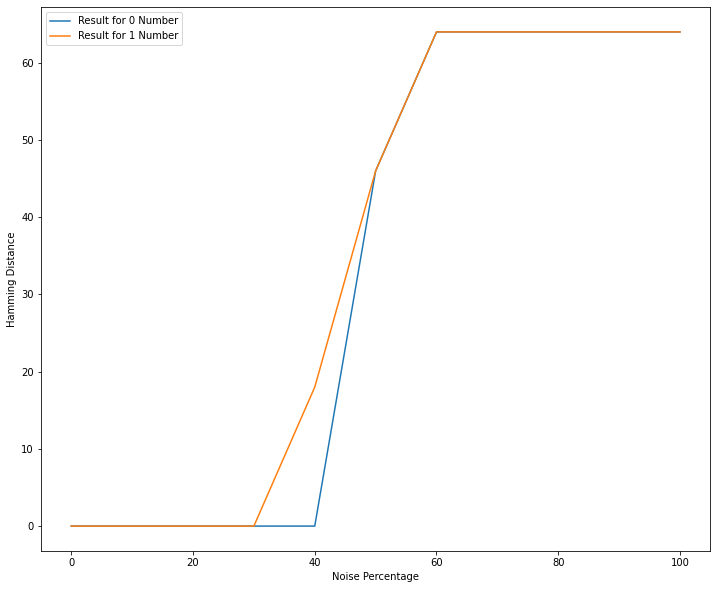

In [ ]:
plot_result(correct_count, noises)